In [6]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from networkx.algorithms import community
import pickle
import csv
#import chart_studio.plotly as py
#from plotly.graph_objs import *
import re
import string
#from textblob import TextBlob
#import preprocessor as p
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters

In [7]:
df = pd.read_csv('all_hashtags_combined.csv') 

In [0]:
G = nx.Graph()

In [0]:
def get_jac_sim(a, b):
    a=a.lower()
    b=b.lower()
    a=set(a.split())
    b=set(b.split())
    c= a.intersection(b)    
    return float(len(c)/ (len(a) + len(b) - len(c)   ))

In [0]:
task3 = df[['user_id', 'text']].copy()

In [ ]:
# ............NOTE......................
#........This cell bellow takes time to exectute, around 45 min to one hour..........
#...........After running the cell bellow......... we Saved the gragh in pickle file .........
#..........One can use the pickle file directly.............., can be leaded in the next cell......

In [0]:
for i in task3.index:
        id1 = df.loc[i,'user_id']
        text1 = df.loc[i,'text']
        for j in task3.index:
          id2 = df.loc[j,'user_id']
          text2 = df.loc[j,'text']
          if id1!=id2:
            j=get_jac_sim(str(text1), str(text2))
            if j>= 0.4:
              G.add_edge(id1,id2)

nx.write_gpickle(G, "Our_Gragh_0.4Sim")

In [0]:
G=nx.read_gpickle( "Our_Gragh_0.4Sim")

In [0]:
colors_central_nodes = ['orange', 'red']
pos= nx.spring_layout(G,scale=1) #default to scale=1


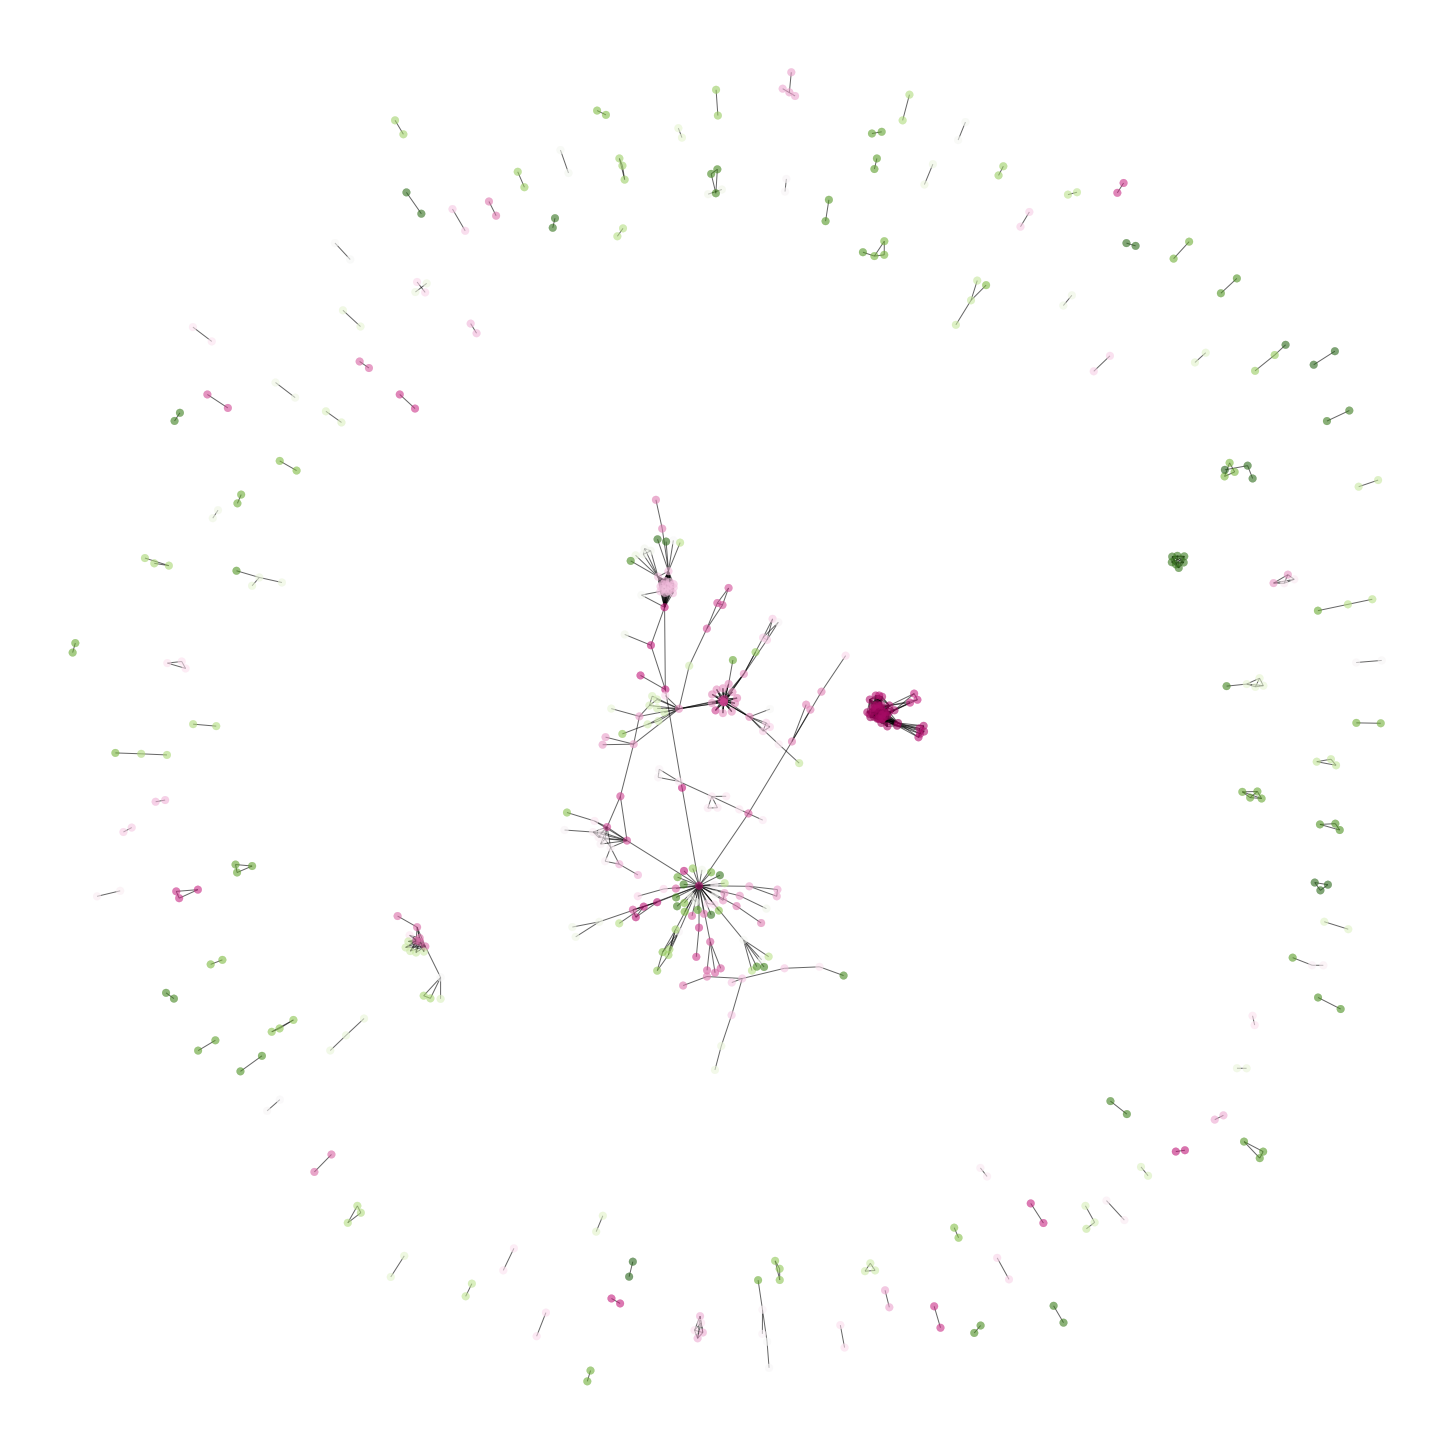

In [6]:
plt.figure(figsize = (20,20))
nx.draw(G, node_color=range(533 ), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
plt.savefig('Our_Whole_Graph.png')
plt.show()

In [7]:
print(f"There are {G.number_of_nodes()} nodes and {G.number_of_edges()} edges present in the Graph")

There are 533 nodes and 1211 edges present in the Graph


In [0]:
degrees = [val for (node, val) in G.degree()]

In [11]:
if nx.is_connected(G):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is not connected


In [12]:
print(f"There are {nx.number_connected_components(G)} connected components in the Graph")

There are 124 connected components in the Graph


In [0]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
largest_subgraph = G.subgraph(Gcc[0])

In [14]:
print(f"There are {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} edges present in the Graph")

There are 168 nodes and 412 edges present in the Graph


In [15]:
if nx.is_connected(largest_subgraph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is connected


In [0]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['orange', 'red']
#central_nodes = ['18059348']

In [0]:
pos = nx.spring_layout(largest_subgraph, k=0.05)

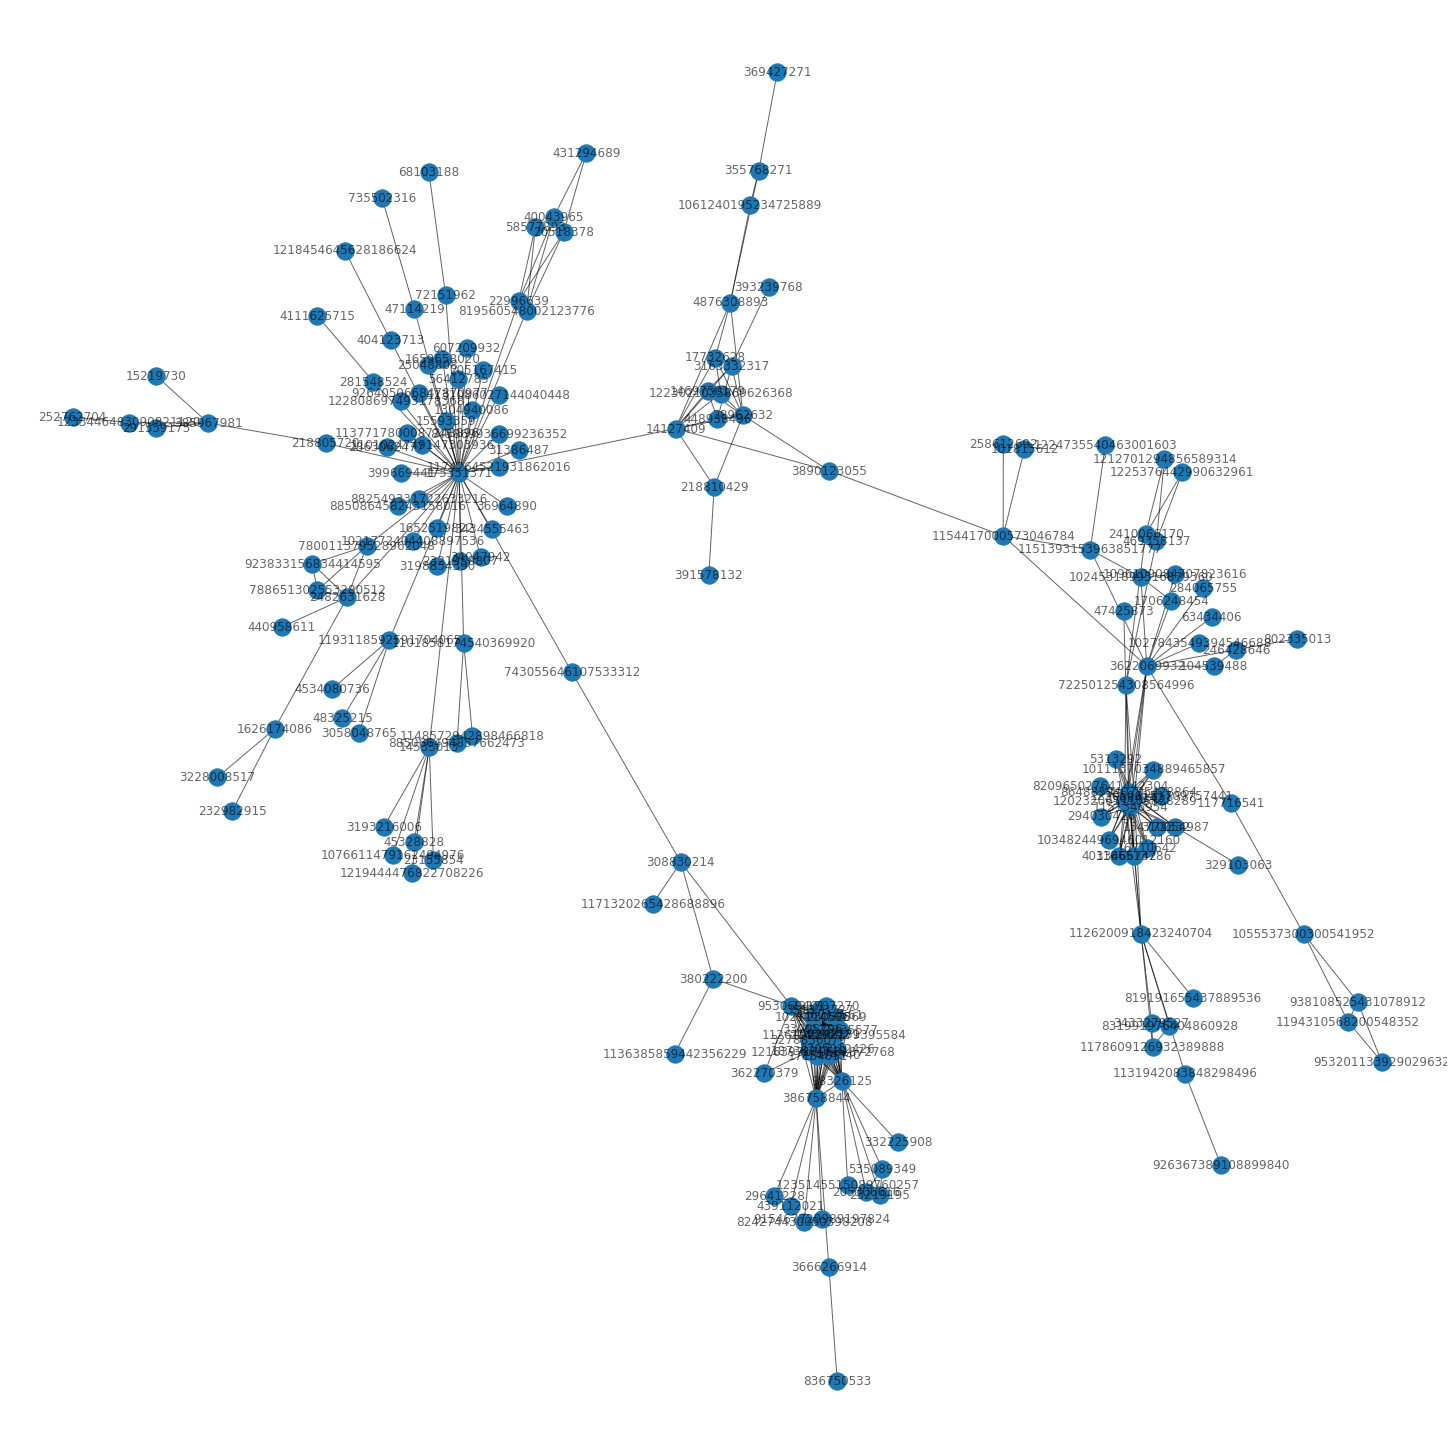

In [18]:
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(168), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=True)
nx.draw_networkx_nodes(largest_subgraph,pos)
plt.savefig('Our_Largest_subragh.png')
plt.show()
